## Exercise04 - Investigating Netflix Movies

**Netflix!** What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions. This data does contain null values and some outliers, but handling these is out of scope for the project. Feel free to experiment after submitting!

### 💾 The data: netflix_data.csv

| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

### Tasks :
Your friend suspects that movies are getting shorter and they've found some initial evidence of this. Having peaked your interest, you will perform exploratory data analysis on the `netflix_data.csv` data to understand what may be contributing to movies getting shorter over time. Your analysis will follow these steps:
1. Filter the data to remove TV shows.
2. Investigate and subset the Netflix movie data, keeping only the columns `"title"`, `"country"`, `"genre"`, `"release_year"`, `"duration"`, and saving this into a new DataFrame for example named `netflix_movies`.
3. Filter `netflix_movies` to find the movies that are strictly shorter than 60 minutes, saving the resulting DataFrame; inspect the result to find possible contributing factors.
4. Using a for loop and if/elif statements, iterate through the rows of `netflix_movies` and assign colors of your choice to four genre groups ("Children", "Documentaries", "Stand-Up", and "Other" for everything else). Save the results in a colors list. Initialize a matplotlib figure object called fig and create a scatter plot for movie duration by release year using the colors list to color the points and using the labels `"Release year"` for the x-axis, `"Duration (min)"` for the y-axis, and the title `"Movie Duration by Year of Release"`.
5. After inspecting the plot, answer the question `"Are we certain that movies are getting shorter?"`.


In [1]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Start coding!
netflix_data = pd.read_csv('netflix_data.csv')

In [5]:
netflix_data.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year  duration  \
0    August 14, 2020          2020         4   
1  December 23, 2016          2016        93   
2  December 20, 2018          2011        78   
3  November 16, 2017          2009        80   
4    January 1, 2020          2008       123   

                                         description             genre  
0  In a future where the elite inhabit an island ...  International TV  
1  After a devastating earthquake hits Mexico Cit...            Dramas  
2  When an army recruit is found dead, his fellow...     Horror Movies  
3  In a postapocalyptic world, rag-doll robots hi...            Action  
4  A brilliant group of students become card-coun...            Dramas

In [6]:
netflix_data.shape

## options 1st to calculate length
num_tv_show = len(netflix_data[netflix_data['type'] == 'TV Show'])
# num_movie = len(netflix_data[netflix_data['type'] == "Movies"])

# ## option 2nd
# num_tv_show_sum = (netflix_data['type'] == 'TV Show').sum()
# num_movei_sum = (netflix_data['type'] == 'Movie').sum()

## option 3th
type_counts = netflix_data['type'].value_counts()
num_movies_vc = type_counts.get('Movie', 0)  ## 0 mean if no type Movie it will return 0

print('total data: ', netflix_data.shape[0])
print('total tv show: ', num_tv_show)
print('total movies: ', num_movies_vc)


total data:  7787
total tv show:  2410
total movies:  5377


### Answer 1

In [7]:
## options 1st
netflix_data = netflix_data[netflix_data['type'] != 'TV Show']

## options 2nd
# netflix_data = netflix_data.drop(netflix_data[netflix_data['type'] == 'TV Show'].index)

## options 3th
# netflix_data = netflix_data.query("type != 'TV Show'")

## options 4th 
# Filter out TV shows
netflix_movies = netflix_data[netflix_data['type'] == 'Movie']

## check if it work
num_tv_show_sum = (netflix_data['type'] == 'TV Show').sum()
print('total tv show: ', num_tv_show_sum)
print('total data: ', netflix_data.shape[0])

total tv show:  0
total data:  5377


### Answer 2 

In [10]:
# Filter out TV shows
netflix_movies = netflix_data[netflix_data['type'] == 'Movie']

# Select the relevant columns
netflix_movies = netflix_movies[['title', 'country', 'genre', 'release_year', 'duration']]

# Display the first few rows of the movies DataFrame
netflix_movies.head()

title        country          genre  release_year  duration
1   7:19         Mexico         Dramas          2016        93
2  23:59      Singapore  Horror Movies          2011        78
3      9  United States         Action          2009        80
4     21  United States         Dramas          2008       123
6    122          Egypt  Horror Movies          2019        95

### Answer 3

In [12]:
# Filter movies shorter than 60 minutes
short_movies = netflix_movies[netflix_movies['duration'] < 60]

# Display the first few rows of the short movies DataFrame
short_movies.head()


title        country  \
35                                           #Rucker50  United States   
55                 100 Things to do Before High School  United States   
67   13TH: A Conversation with Oprah Winfrey & Ava ...            NaN   
101                                  3 Seconds Divorce         Canada   
146                                     A 3 Minute Hug         Mexico   

             genre  release_year  duration  
35   Documentaries          2016        56  
55   Uncategorized          2014        44  
67   Uncategorized          2017        37  
101  Documentaries          2018        53  
146  Documentaries          2019        28

### Answer 4

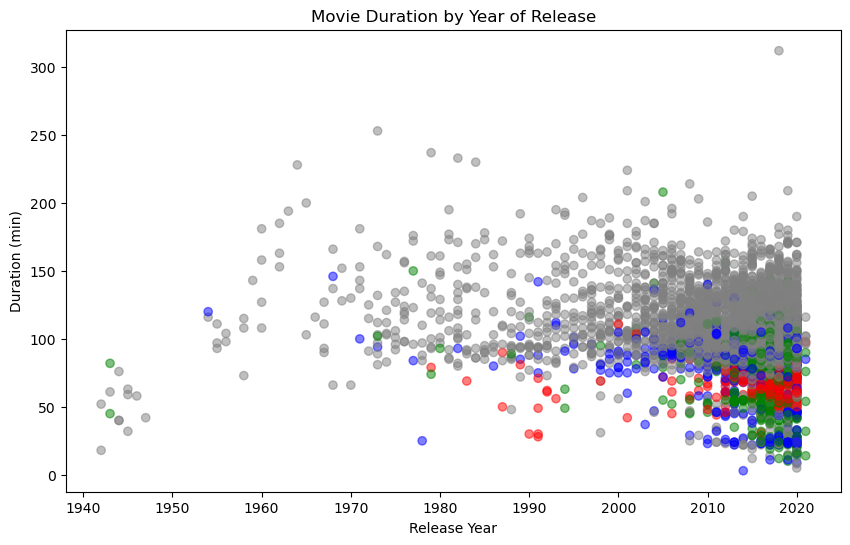

In [13]:
import matplotlib.pyplot as plt

# Define genre groups and colors
colors = []
for index, row in netflix_movies.iterrows():
    if 'Children' in row['genre']:
        colors.append('blue')
    elif 'Documentaries' in row['genre']:
        colors.append('green')
    elif 'Stand-Up' in row['genre']:
        colors.append('red')
    else:
        colors.append('gray')

# Create a scatter plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the data
ax.scatter(netflix_movies['release_year'], netflix_movies['duration'], c=colors, alpha=0.5)

# Setting the labels and title
ax.set_xlabel('Release Year')
ax.set_ylabel('Duration (min)')
ax.set_title('Movie Duration by Year of Release')

plt.show()